Projeto realizado para comparar os focos de incêncio no estado do Mato Grosso no período entre 01-12-20 à 29-12-2020 através do software QGIS e geopandas.
Os valores utilizados para a criação dos mapas foram da coluna FRP.

FRP: taxa na qual energia é emitida pelo fogo na
forma de radiação durante queimada
(WOOSTER et al., 2003)

**Fonte:** 
- [Base de dados do estado do Mato Grosso no período de 01/12/2020 a 29/12/2020](https:/http://queimadas.dgi.inpe.br/queimadas/bdqueimadas//)
- [Arquivos Shapefile](https://www.ibge.gov.br/geociencias/downloads-geociencias.html)


In [1]:
# biblioteca responsavel pela criação de mapas, como não vem incluída no colab, é preciso instalá-la.
!pip install geopandas

In [2]:
# a biblioteca unidecode foi instalada para realizar um tratamento de strings no agrupamento dos datasets
!pip install unidecode

In [3]:
# permissão para o colab acessar o Google Drive, local onde os arquivos estão
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


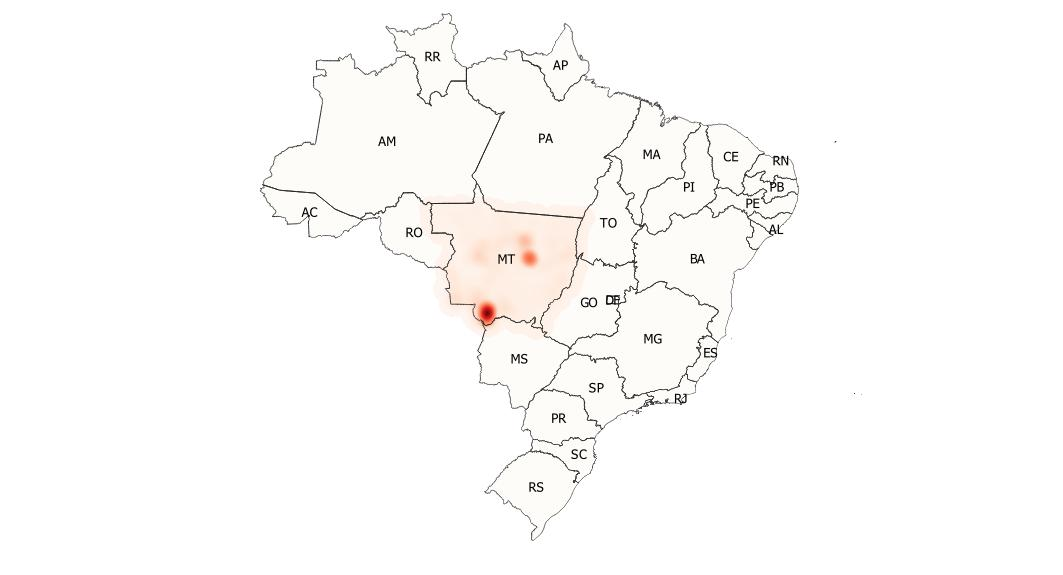

In [4]:
""" a imagem que utilizei para realizar o desenho era somente dos estados brasileiros, não incluindo o contorno das cidades.
Pelo QGIS utilizei o Mapa de Calor (Estimativa  de Densidade Kernel) com o Kernel shape "quartico". O raio usado foi de 10000 e o tamanho dos pixels de 200.
"""
from IPython.display import Image
Image('/content/drive/MyDrive/datasets/focos_incencio_mt/focos_incendio_mt.jpeg')

In [5]:
# importando as bibliotecas que irão ser utilizadas no projeto
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
# lendo os arquivos
pasta = '/content/drive/MyDrive/datasets/focos_incencio_mt'
municipios = os.path.join(pasta, 'BR_Municipios')
focos_queimada = os.path.join(pasta, 'Focos_BDQueimadas.zip')

In [7]:
# esse método é utilizado para verificar o nome de todos os arquivos que estão compactados em um arquivo zip
with ZipFile(focos_queimada) as z:
  print(z.namelist())

['Focos_2020-12-01_2020-12-29.csv']


In [8]:
# abrindo o arquivo zipado e lendo o arquivo que me interessa para a análise
with ZipFile(focos_queimada) as z:
  with z.open('Focos_2020-12-01_2020-12-29.csv') as f:
    data = pd.read_csv(f)

In [9]:
# método utilizado para verificar as 5 primeiras linhas
data.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2020/12/01 00:03:38,GOES-16,Brasil,MATO GROSSO,PEDRA PRETA,Cerrado,NaN,NaN,NaN,-17.02,-54.57,NaN
1,2020/12/01 00:03:59,GOES-16,Brasil,MATO GROSSO,GAUCHA DO NORTE,Cerrado,NaN,NaN,NaN,-13.61,-53.52,NaN
2,2020/12/01 00:03:59,GOES-16,Brasil,MATO GROSSO,GAUCHA DO NORTE,Cerrado,NaN,NaN,NaN,-13.63,-53.51,NaN
3,2020/12/01 00:03:59,GOES-16,Brasil,MATO GROSSO,GAUCHA DO NORTE,Cerrado,NaN,NaN,NaN,-13.63,-53.49,NaN
4,2020/12/01 00:04:05,GOES-16,Brasil,MATO GROSSO,FELIZ NATAL,Amazonia,NaN,NaN,NaN,-12.73,-55.18,NaN


In [10]:
# tratamento usado para padronizar a coluna, deixando as primeiras letras em maiúscula
data['municipio'] = data['municipio'].str.title()
data['municipio']

0            Pedra Preta
1        Gaucha Do Norte
2        Gaucha Do Norte
3        Gaucha Do Norte
4            Feliz Natal
              ...       
26718             Denise
26719     Gloria D'Oeste
26720            Caceres
26721            Caceres
26722            Caceres
Name: municipio, Length: 26723, dtype: object

In [11]:
# aqui utilizei o método sample para verificar se o tratamento foi aplicado no dataset. 
data.sample(7)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
8947,2020/12/04 13:33:38,GOES-16,Brasil,MATO GROSSO,Pocone,Pantanal,NaN,NaN,NaN,-16.8800,-57.3900,NaN
3062,2020/12/02 05:06:00,NOAA-20,Brasil,MATO GROSSO,Paranatinga,Amazonia,9.0,0.0,0.4,-12.9211,-54.1200,21.8
8875,2020/12/04 06:54:05,GOES-16,Brasil,MATO GROSSO,Paranatinga,Amazonia,NaN,NaN,NaN,-12.9100,-54.1300,NaN
8840,2020/12/04 05:24:00,NPP-375,Brasil,MATO GROSSO,Nova Maringa,Amazonia,NaN,NaN,NaN,-12.2247,-57.1096,0.9
52,2020/12/01 01:58:09,METOP-B,Brasil,MATO GROSSO,Brasnorte,Cerrado,NaN,NaN,NaN,-12.9695,-57.8534,NaN
25734,2020/12/25 16:23:56,GOES-16,Brasil,MATO GROSSO,Nova Lacerda,Amazonia,1.0,10.4,0.0,-14.2900,-59.9900,NaN
2785,2020/12/02 04:18:00,NPP-375,Brasil,MATO GROSSO,Paranatinga,Amazonia,9.0,0.0,0.3,-12.9333,-54.1411,2.8


AxesSubplot(0.230311,0.125;0.564379x0.755)


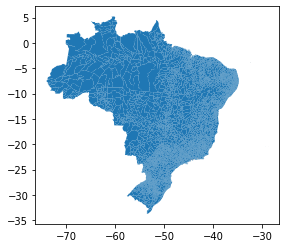

In [12]:
"""lendo o arquivo shapefile utilizando o pandas e plotando o gráfico. 
Obs: esse arquivo diferente do usado no QGIS contém o contorno das cidades
"""
geo_df = gpd.read_file(municipios)
print(geo_df.plot())

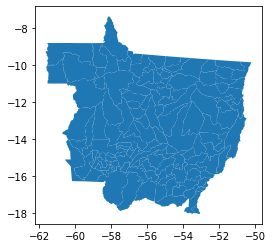

In [13]:
# aqui eu decidi usar somente o estado do Mato Grosso, então selecionei o novo frame filtrando a coluna 'SIGLA_UF' e sobreescrevi o objeto geo_df
geo_df = geo_df[geo_df['SIGLA_UF'] == 'MT']
geo_df.plot();

In [14]:
# aqui eu apliquei a decodificação da coluna 'NM_MUN' e padronizei em titulo, assim como já tinha realizado com o objeto 'data'
from unidecode import unidecode
geo_df['NM_MUN'] = geo_df['NM_MUN'].apply(unidecode).str.title()

In [15]:
"""renomeei a coluna data para posteriormente unir ambos os dataframes
Obs: como usarei o merge não era necessário renomear. Eu optei por isso pois gosto de trabalhar com nomes iguais.
"""
data.rename({'municipio': 'NM_MUN'}, axis=1, inplace=True)

In [16]:
''' agrupei o data frame pelo 'NM_MUN' e somei os campos. 
Como só irei utilizar o campo 'frp' não me preocupei com a soma da latitude e longitude dos municípios
'''
mt_dez_2020 = data.groupby('NM_MUN').sum().reset_index()
mt_dez_2020

,NM_MUN,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,Acorizal,9.0,0.1,2.3,-75.8222,-281.0810,21.8
1,Agua Boa,171.0,31.9,24.0,-905.7175,-3411.0160,608.8
2,Alta Floresta,106.0,91.4,16.0,-788.5892,-4403.8808,422.1
3,Alto Araguaia,19.0,118.1,7.0,-771.8676,-2360.1838,390.7
4,Alto Boa Vista,41.0,25.4,3.3,-413.5789,-1808.9624,100.0
...,...,...,...,...,...,...,...
136,Vale De Sao Domingos,2.0,0.0,0.8,-150.7305,-590.0000,18.6
137,Varzea Grande,42.0,89.3,54.1,-1024.5935,-3711.2989,277.7
138,Vera,17.0,0.0,2.5,-50.0470,-220.5920,71.6
139,Vila Bela Da Santissima Trindade,1000.0,1566.0,273.0,-12248.8724,-47098.0512,3852.4


In [17]:
# agrupei os dois objetos para criar somente um dataframe
geo_df_agrupado = geo_df.merge(mt_dez_2020, on='NM_MUN')
geo_df_agrupado

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,5100102,Acorizal,MT,1014.029,"POLYGON ((-56.40526 -15.17179, -56.40659 -15.1...",9.0,0.1,2.3,-75.8222,-281.0810,21.8
1,5100201,Agua Boa,MT,7510.635,"POLYGON ((-52.99806 -13.94527, -52.99803 -13.9...",171.0,31.9,24.0,-905.7175,-3411.0160,608.8
2,5100250,Alta Floresta,MT,8953.213,"POLYGON ((-56.33177 -9.90153, -56.33164 -9.900...",106.0,91.4,16.0,-788.5892,-4403.8808,422.1
3,5100300,Alto Araguaia,MT,5399.326,"POLYGON ((-53.68214 -17.29185, -53.68011 -17.2...",19.0,118.1,7.0,-771.8676,-2360.1838,390.7
4,5100359,Alto Boa Vista,MT,2240.437,"POLYGON ((-51.45051 -11.67625, -51.45051 -11.6...",41.0,25.4,3.3,-413.5789,-1808.9624,100.0
...,...,...,...,...,...,...,...,...,...,...,...
136,5108600,Vila Rica,MT,7431.481,"POLYGON ((-51.52529 -10.11907, -51.52629 -10.1...",234.0,103.3,36.6,-770.0884,-3947.0856,653.7
137,5108808,Nova Guarita,MT,1114.126,"POLYGON ((-55.47416 -10.26278, -55.47423 -10.2...",0.0,0.0,0.4,-10.4314,-55.2860,1.6
138,5108857,Nova Marilandia,MT,1936.428,"POLYGON ((-57.07846 -14.18762, -57.07395 -14.1...",149.0,430.0,56.8,-2351.3917,-9384.4203,1432.3
139,5108907,Nova Maringa,MT,11555.987,"POLYGON ((-57.47796 -12.42556, -57.47825 -12.4...",759.0,142.4,70.7,-4003.6308,-17787.8964,2200.2


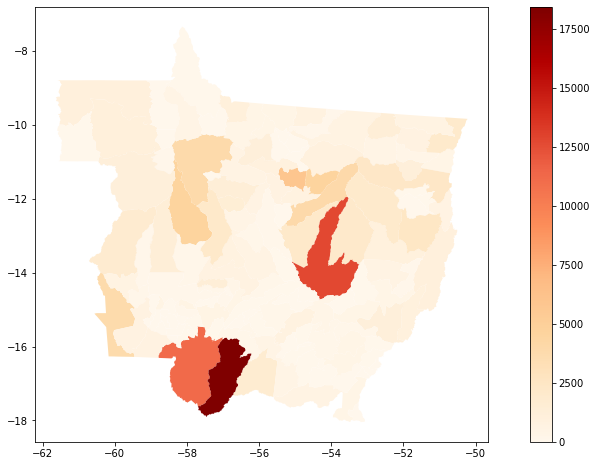

In [18]:
# Plotando o gráfico usando a coluna FRP para verificar a taxa de FRP.
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
geo_df_agrupado.plot(column='frp', legend=True,
                     ax=ax, cmap='OrRd');

In [19]:
# verificando as 3 cidades com mais taxa de FRP
geo_df_agrupado[['frp', 'NM_MUN']].sort_values(by='frp', ascending=False).head(3)

,frp,NM_MUN
90,18431.8,Pocone
85,12759.3,Paranatinga
19,11203.2,Caceres


# Conclusão:
* Mesmo usando mapas diferentes, é possivel perceber que os pontos de maior taxa de FRP se equiparam;
* Para uma maior acurácia, seria interessante utilizar um heatmap neste projeto;
* A região mais avermelhada são referentes aos municípios de: Poconé, Paranatinga, Cáceres;